In [322]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
# jupyter notebook warning 무시하기

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

from glob import glob
import re
import math

http://www.me.go.kr/home/web/policy_data/read.do?pagerOffset=10&maxPageItems=10&maxIndexPages=10&searchKey=title&searchValue=%ED%8F%90%EC%88%98%EC%B2%98%EB%A6%AC%EC%8B%9C%EC%84%A4&menuId=10263&orgCd=&condition.deleteYn=N&seq=7255
환경부 환경정책 물환경관리 공공폐수처리시설 현황

In [323]:
df = pd.read_excel('../../data/team/폐수처리시설_2015.xlsx')
col_list = df.columns

In [145]:
df

,구분,유역청,시도,시군,일별처리량,소재지\n(도로명 주소 및 지번주소 병기),대권역명,중권역명,소권역명,공동처리구역면적(ha),...,평균\n처리효율\n(%).3,유입T-P(mg/L)평균,방류T-P(mg/L)평균,평균\n처리효율\n(%).4,유입대장균군수(개/mL)평균,방류대장균군수(개/mL)평균,평균\n처리효율\n(%).5,유입생태독성(TU)평균,방류생태독성(TU)평균,평균\n처리효율\n(%).6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,T-P(mg/L),NaN,NaN,대장균군수(개/mL),NaN,NaN,생태독성(TU),NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,평균\n처리효율\n(%),유입,방류,평균\n처리효율\n(%),유입,방류,평균\n처리효율\n(%),유입,방류,평균\n처리효율\n(%)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,평균,평균,NaN,평균,평균,NaN,평균,평균,NaN
3,지방산단,낙동강,부산,기장군,416.000000,부산 기장군 장안 장안산단 1로 89(반룡리 860),낙동강권역,수영강,효암천,154.3,...,0.903284,10.285,0.286,0.972193,68792,379,0.994491,2.86,0,1
4,지방산단,낙동강,부산,부산시,67.671233,부산 기장군 장안읍 명례산단 1로 5(기룡리 1139-7),낙동강권역,수영강,효암천,156.6,...,0.735219,6,1.1,0.816667,589000,12,0.99998,1.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,지방산단,원주,충북,음성군,1550.000000,음성군 금왕읍 대금로1278번길 7\n(음성군 금왕읍 오선리 36-2),금강권역,미호천,미호천상류,57.1,...,0.92465,6.2,0.09,0.985484,45795,18,0.999607,1,0,1
186,지방산단,원주,충북,음성군,1230.000000,음성군 삼성면 하이텍산단로 52\n(음성군 삼성면 상곡리 766),금강권역,미호천,미호천상류,39.7,...,0.834118,8.291,0.028,0.996623,1875,27,0.9856,1.8,0,1
187,지방산단,원주,충북,음성군,2500.000000,음성군 맹동면 맹동산단1길 48\n(음성군 맹동면 쌍정리 288),금강권역,미호천,미호천상류,41.8,...,0.4,14,0.287,0.9795,32000,500,0.984375,1,0,1
188,지방산단,원주,충북,음성군,575.000000,음성군 원남면 원남산단로 81\n(음성군 원남면 상노리 769),한강권역,달천,음성천,111.3,...,0.891607,6.12,0.288,0.952941,15000,29,0.998067,1.1,0,1


In [324]:
df1 = pd.read_excel('../../data/team/폐수처리시설_2015.xlsx', skiprows=3)
df2 = pd.read_excel('../../data/team/폐수처리시설_2016.xlsx', skiprows=3)
df3 = pd.read_excel('../../data/team/폐수처리시설_2017.xlsx', skiprows=3)
df4 = pd.read_excel('../../data/team/폐수처리시설_2018.xlsx', skiprows=3)

In [325]:
df2 = df2.iloc[:,0:47]

In [326]:
# 어째서인지 2016년 자료는 컬럼이 한개 마지막에 생성됨

df1.iloc[:,0] = 2015
df2.iloc[:,0] = 2016
df3.iloc[:,0] = 2017
df4.iloc[:,0] = 2018


In [327]:
a = pd.concat([df1,df2,df3,df4])
a.columns = col_list

In [328]:
a = a.rename(columns = {'구분':'년'})

In [152]:
a.to_csv('../../data/team/폐수처리시설_concat.csv',index=False, encoding ='utf-8')
a.to_csv('../../data/team/폐수처리시설_concat_R.csv',index=False, encoding ='ANSI')

In [329]:
# 시군이 환경부로 되어있는거 7개를 손으로 변경
df = pd.read_csv('../../data/team/폐수처리시설_concat_R.csv', encoding = 'ANSI')


# 제주 데이터가 없어서 밑 링크의 하수도통계, 하수처리 항목에서 해결

http://www.me.go.kr/home/web/policy_data/read.do?pagerOffset=0&maxPageItems=10&maxIndexPages=10&searchKey=title&searchValue=%ED%86%B5%EA%B3%84&menuId=10264&orgCd=&condition.deleteYn=N&seq=6937

1. 제주데이터는 ss가 없어서 평균치로 대체


In [330]:
df1 = df.drop([ '유입BOD(mg/L)', '대권역명','유역청','대권역명','중권역명','소권역명','공동처리구역면적(ha)',
       '총처리량\n(천톤/년)','중권역명', '소권역명','방류BOD(mg/L)', '유입COD(mg/L)', '방류COD(mg/L)',
       '유입SS(mg/L)', '방류SS(mg/L)', '유입T-N(mg/L)', '방류T-N(mg/L)', '유입T-P(mg/L)',
       '방류T-P(mg/L)', '유입대장균군수(개/mL)', '방류대장균군수(개/mL)', '유입생태독성(TU)',
       '방류생태독성(TU)','평균\n처리효율\n(%).1','평균\n처리효율\n(%).2','평균\n처리효율\n(%).3',
         '평균\n처리효율\n(%).4','평균\n처리효율\n(%).5','평균\n처리효율\n(%).6','방류생태독성(TU)평균','유입생태독성(TU)평균'],axis = 1)

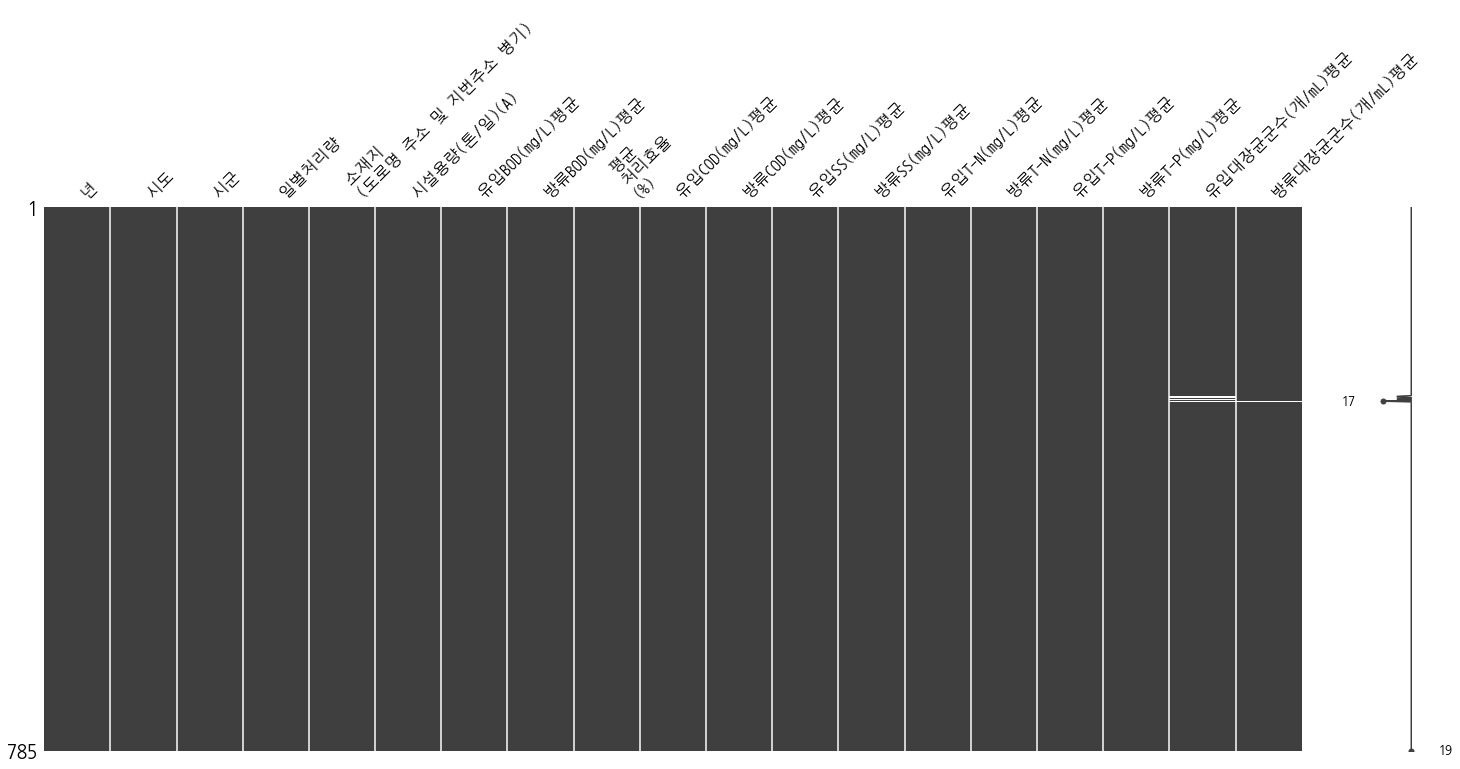

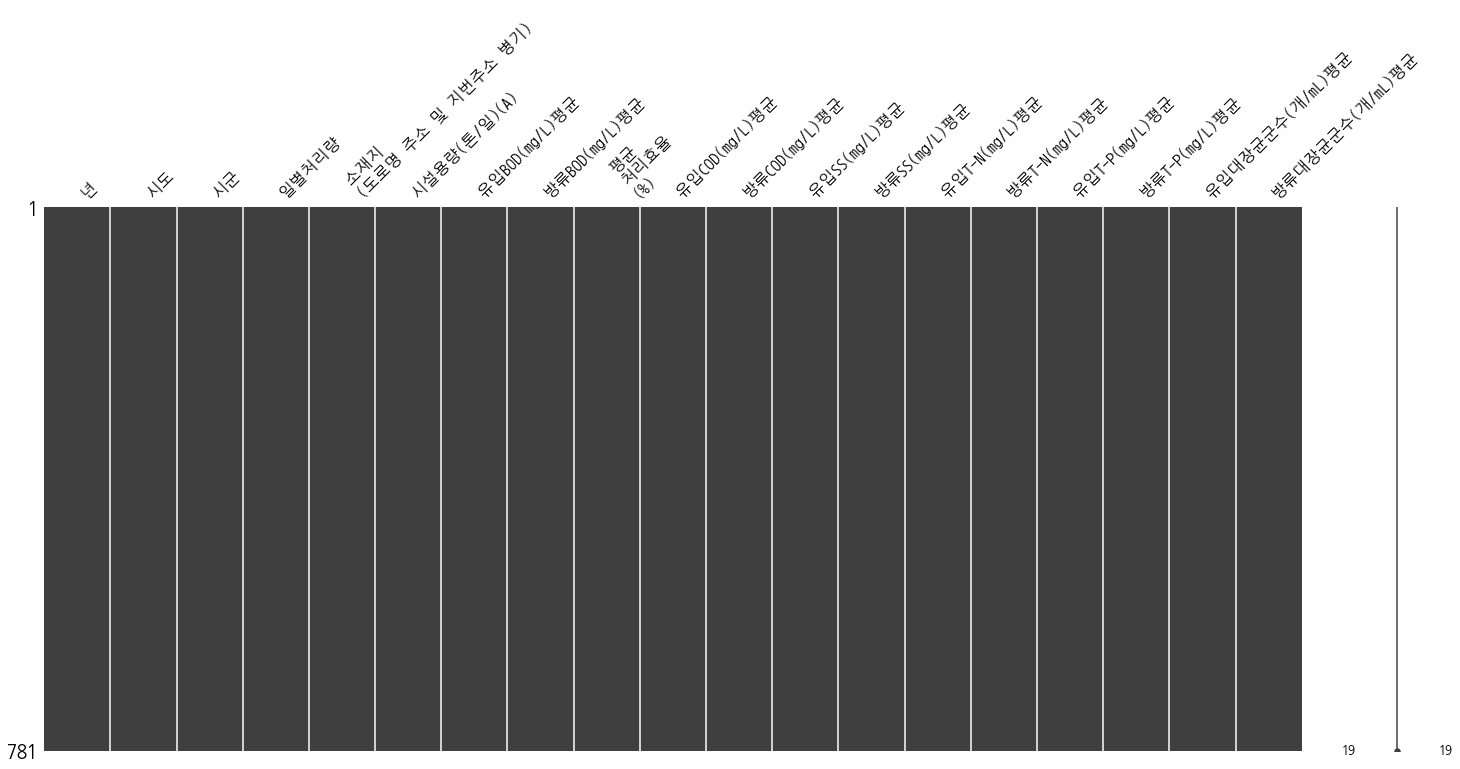

In [331]:
import missingno as msno

msno.matrix(df1)

df1 = df1.dropna()
msno.matrix(df1)

In [97]:
df1.to_csv('../../data/team/폐수처리시설_1.csv',index=False, encoding ='utf-8')
df1.to_csv('../../data/team/폐수처리시설_1_R.csv',index=False, encoding ='ANSI')
df1_jeju = pd.read_csv('../../data/team/제주시 임시방편.csv', encoding = 'ANSI')
df1_all= ''
df1_all = pd.concat([df1,df1_jeju])

In [98]:
df1_all.to_csv('../../data/team/폐수처리시설_all.csv',index=False, encoding ='utf-8')
df1_all.to_csv('../../data/team/폐수처리시설_all_R.csv',index=False, encoding ='ANSI')

# 해협별 분류가 필요

1. 시군을 기준으로 해엽을 분류, 년도별 평균값을 구합 df2 -해엽을 기준으로 1차 넣음
2. df_all의 구군을 추출, df1의 도로명 주소에서 같은 위치를 찾은 뒤 이들을 평균냄, 이를 2차로 넣음
3. 

In [332]:
df_si = pd.DataFrame(columns=['시','생태구역'])
si = df1_all['시군'].unique()
for i in range(len(si)):
    df_si.loc[i] = [si[i],1]

In [98]:
# 이건 직접 해봄
# df_si.to_csv('tmp.csv',index=False, encoding='ANSI')

In [333]:
df1_all = pd.read_csv('../../data/team/폐수처리시설_all.csv')
df_si = pd.read_csv('tmp.csv', encoding = 'ANSI')

In [334]:
df_si = df_si.set_index('시')
df_si

,생태구역
시,
기장군,대한해협
부산시,대한해협
울주군,대한해협
의령군,대한해협
거창군,대한해협
...,...
광양만권경제자유구역청,서해중부
대구시,대한해협
영덕군,동해


In [335]:
# 생태구역별 평균
df1_all['생태구역'] = ''
for i in df1_all.index:
    for j in df_si.index:
        if df1_all.loc[i, '시군'] == j:
            df1_all.loc[i,'생태구역'] = df_si.loc[j,'생태구역']
            break

In [255]:
df1_all.to_csv('../../data/폐수데이터+생태구역.csv',encoding= 'ANSI',index=False)

In [336]:
df2  = df1_all.groupby(['년','생태구역']).mean()
df2

일별처리량  시설용량(톤/일)(A)  유입BOD(mg/L)평균  방류BOD(mg/L)평균  \
년    생태구역                                                            
2015 대한해협  5068.634220   7615.384615     377.639723       3.053643   
     동해     721.919178   2221.428571    1517.000000       3.114286   
     서남해역  5304.519664   8584.838710     350.012532       3.724613   
     서해중부  6157.831160   9800.103093     298.458406       4.160226   
     제주    3958.362500   4883.875000      78.170833       4.947917   
2016 대한해협  2060.862500   8126.666667     319.698575       2.629074   
     동해    2977.285714   2221.428571    1523.885714       2.057143   
     서남해역  7326.636364   7763.636364     314.594333       3.289940   
     서해중부  6793.580000   9444.600000     289.556066       3.517926   
     제주    4130.750000   4883.979167      89.514583       4.872917   
2017 대한해협  4876.070015   7389.444444     273.770889       2.317945   
     동해     650.505479   1971.250000    1471.696311       1.805588   
     서남해역  5309.478705   7763.636364     288.335631       3.586900   
     서해중부  6382.402383   9433.592233     305.792738       2.726368   
     제주    4411.719565   5279.630435     123.650000       4.767391   
2018 대한해협  4765.481051   6843.148148     276.516484       2.397675   
     동해     704.061808   2052.222222    1343.377032       2.107723   
     서남해역  5843.547135   8102.702703     210.065697       2.706902   
     서해중부  6005.707681   9719.074074     292.482409       2.668403   
     제주    5527.950000   6054.775000     121.562500       8.255000   

           평균\n처리효율\n(%)  유입COD(mg/L)평균  방류COD(mg/L)평균  유입SS(mg/L)평균  \
년    생태구역                                                              
2015 대한해협       0.935810     240.516673      10.095590    181.497292   
     동해         0.994759     689.785714      13.581429    760.171429   
     서남해역       0.914567     268.187185      11.431348    309.329006   
     서해중부       0.975875     181.578498      10.217169    183.557972   
     제주        90.116757      61.954167       8.906250    132.609302   
2016 대한해협       0.947688     219.643805       9.615932    220.584588   
     동해         0.996714     733.957143      11.114286    818.471429   
     서남해역       0.936424     186.839485       9.810298    241.441559   
     서해중부       0.976710     192.737854       9.883923    207.192431   
     제주        91.849114      50.470833       9.247917    132.609302   
2017 대한해협       0.949877     165.796027       8.737064    173.695105   
     동해         0.996308     727.457446      10.179449    725.314424   
     서남해역       0.951658     186.127040       9.962702    271.498465   
     서해중부       0.983305     196.433713       9.670422    256.408725   
     제주        95.158696      58.467391       9.389130    132.704348   
2018 대한해협       0.942439     174.947575       8.590316    175.646425   
     동해         0.995812     600.355114       8.747403    664.651781   
     서남해역       0.960427     155.627514       9.841487    338.408513   
     서해중부       0.973838     165.175984       9.359734    205.875562   
     제주        92.865000      62.942500      14.280000    132.500000   

           방류SS(mg/L)평균  유입T-N(mg/L)평균  방류T-N(mg/L)평균  유입T-P(mg/L)평균  \
년    생태구역                                                              
2015 대한해협      3.213725      43.005773       7.361592       5.808366   
     동해        2.375714     187.830286      10.212714      31.342143   
     서남해역      3.655139      42.764799      10.620102       6.957486   
     서해중부      3.533252      40.247412       8.851747       5.630100   
     제주        7.661628      34.306813      12.033313       4.167500   
2016 대한해협      3.044075      46.740720       6.934331       5.467647   
     동해        2.728571     164.310000       8.072143      29.399714   
     서남해역      3.069986      49.177266       9.690438       6.791983   
     서해중부      2.935102      42.562608       7.962069       5.308348   
     제주        7.661628      32.167062      12.546500       4.156583   
2017 대한해협      2.425880    

In [257]:
df2_2015 = df2.xs(2015).reset_index()
df2_2015['년'] = 2015
df2_2016= df2.xs(2016).reset_index()
df2_2016['년'] = 2016
df2_2017 = df2.xs(2017).reset_index()
df2_2017['년'] = 2017
df2_2018 = df2.xs(2018).reset_index()
df2_2018['년'] = 2018

In [258]:
df2_mean = pd.concat([df2_2015,df2_2016,df2_2017,df2_2018])


In [259]:
df2_mean.to_csv('../../data/team/생태구역별방류수.csv', index=False, encoding = 'utf-8')
df2_mean.to_csv('../../data/team/생태구역별방류수_R.csv', index=False, encoding = 'ANSI')

In [260]:
# 시군별 평균치

df3 = df1_all.groupby(['년','시군']).mean()

df3_2015 = df3.xs(2015).reset_index()
df3_2015['년'] = 2015
df3_2016= df3.xs(2016).reset_index()
df3_2016['년'] = 2016
df3_2017 = df3.xs(2017).reset_index()
df3_2017['년'] = 2017
df3_2018 = df3.xs(2018).reset_index()
df3_2018['년'] = 2018

df3_mean = pd.concat([df3_2015,df3_2016,df3_2017,df3_2018])


    
df3_mean.to_csv('../../data/team/시군별방류수.csv', index=False, encoding = 'utf-8')
df3_mean.to_csv('../../data/team/시군별방류수_R.csv', index=False, encoding = 'ANSI')

In [337]:
df_all = pd.read_csv('../../data/team/수질+수거량+정화.csv')
df2_mean = pd.read_csv('../../data/team/생태구역별방류수.csv')
df_all = df_all.drop('Ds', axis= 1)
df3_mean = pd.read_csv('../../data/team/시군별방류수.csv')
# 컬럼추가
list_a = list(df2_mean.columns[1:-1])
for i in list_a:
    df_all[i] = ''

In [338]:
# 생태구 통합
for i in df_all.index:
    area = df_all.loc[i,'생태구역']
    year = int(df_all.loc[i,'년월']/100)
    for j in df2_mean.index:
        if (df2_mean.loc[j,'생태구역'] == area)&(df2_mean.loc[j,'년'] == year):
            df_all.loc[i,'일별처리량':] = df2_mean.loc[j,'일별처리량':'방류대장균군수(개/mL)평균']
            

In [339]:
# 시, 구군통합
for i in df_all.index:
    area = df_all.loc[i,'구군']
    year = int(df_all.loc[i,'년월']/100)
    for j in df3_mean.index:
        if (df3_mean.loc[j,'시군'].find(area) != -1)&(df3_mean.loc[j,'년'] == year):
            df_all.loc[i,'일별처리량':] = df3_mean.loc[j,'일별처리량':'방류대장균군수(개/mL)평균']
            break
            

In [340]:
# 도로명주소, 구군통합
for i in df_all.index: 
    if df_all.loc[i,'구군'] != '동해':
        area = df_all.loc[i,'구군']
    else :
        area = '동해시'
        
    tmp = df1_all[df1_all['소재지\n(도로명 주소 및 지번주소 병기)'].str.contains(area)]
    year = int(df_all.loc[i,'년월']/100)
  
    if len(tmp) != 0:
        for j in tmp['년'].unique():
            if year == j:
                df_all.loc[i,'일별처리량':] = tmp[tmp['년'] == j].mean().iloc[1:]

In [347]:
df_all.to_csv('../../data/team/수질데이터최종.csv', index=False, encoding = 'utf-8')
df_all.to_csv('../../data/team/수질데이터최종_R.csv', index=False, encoding = 'ANSI')

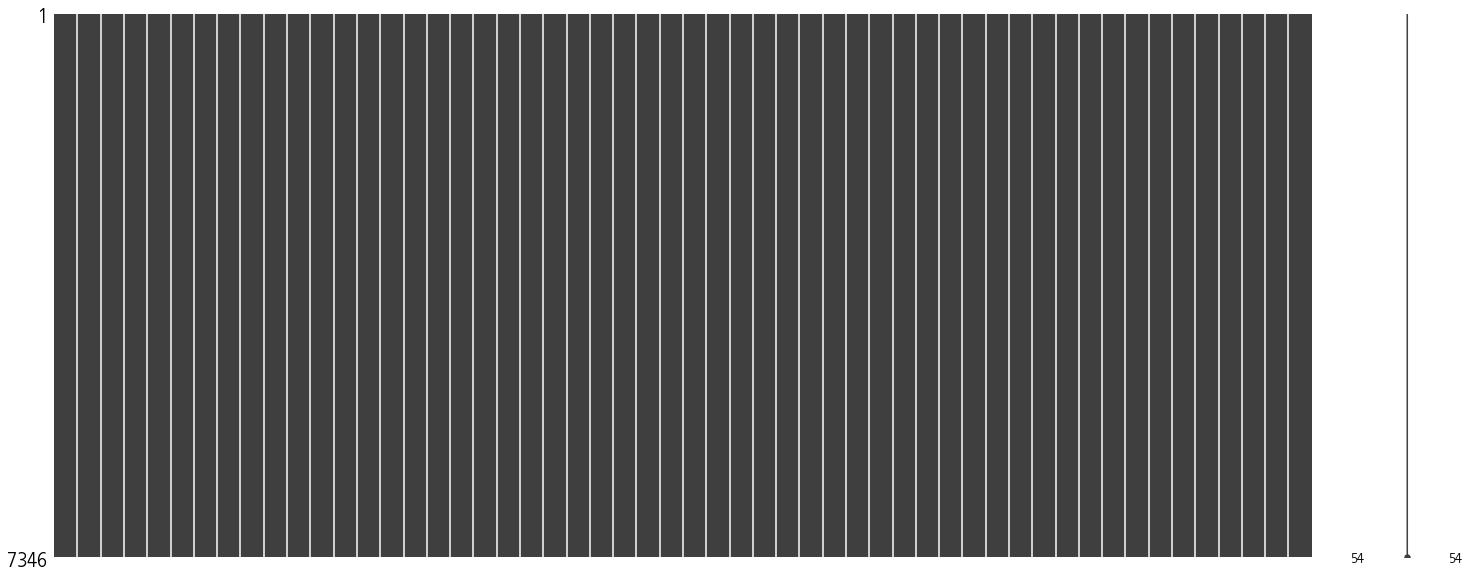

In [341]:
msno.matrix(df_all)